# Cho tập dữ liệu Wine Quality


## 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thông tin mô tả

## 2. Phân tích khám phá dữ liệu
### 2.1 Kiểm tra giá trị thiếu
### 2.2 Vẽ histogram cho tất cả các biến và nhận xét
### 2.3 Vẽ boxplot cho tất cả các biến và nhận xét
### 2.4 Vẽ scatterplot cho  "alcohol" và "quality"

## 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

## 4. Chia tập tin dữ liệu thủ công không dùng thư viện có sẵn
### 4.1 Xáo trộn dữ liệu
### 4.2 Chia dữ liệu với 80% huấn luyện
### 4.3 Tách dữ liệu
### 4.4 Tách đặc trưng và nhãn

## 5. Chuẩn bị dữ liệu
### 5.1 Khởi tạo bộ dữ liệu chuẩn hoá
### 5.2 Chuẩn hoá huấn luyện
### 5.3 Chuẩn hoá kiểm tra

## 6. Ứng dụng mô hình hồi quy tuyến tính
### 6.1 Khởi tạo
### 6.2 Huấn luyện
### 6.3 Dự đoán trên tập kiểm tra

## 7. Đánh giá mô hình 
### 7.1 Tính MSE và R^2


In [12]:
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thông tin mô tả
import pandas as pd
# Đọc dữ liệu từ tệp CSV
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)
# Hiển thị 5 dòng đầu tiên
head_data = df.head()
# Thông tin về dữ liệu
info_data = df.info()
# Thống kê mô tả
describe_data = df.describe()
head_data, describe_data





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


(  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
 0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
 1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
 2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
 3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
 4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                            

Số lượng giá trị thiếu trong mỗi cột:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


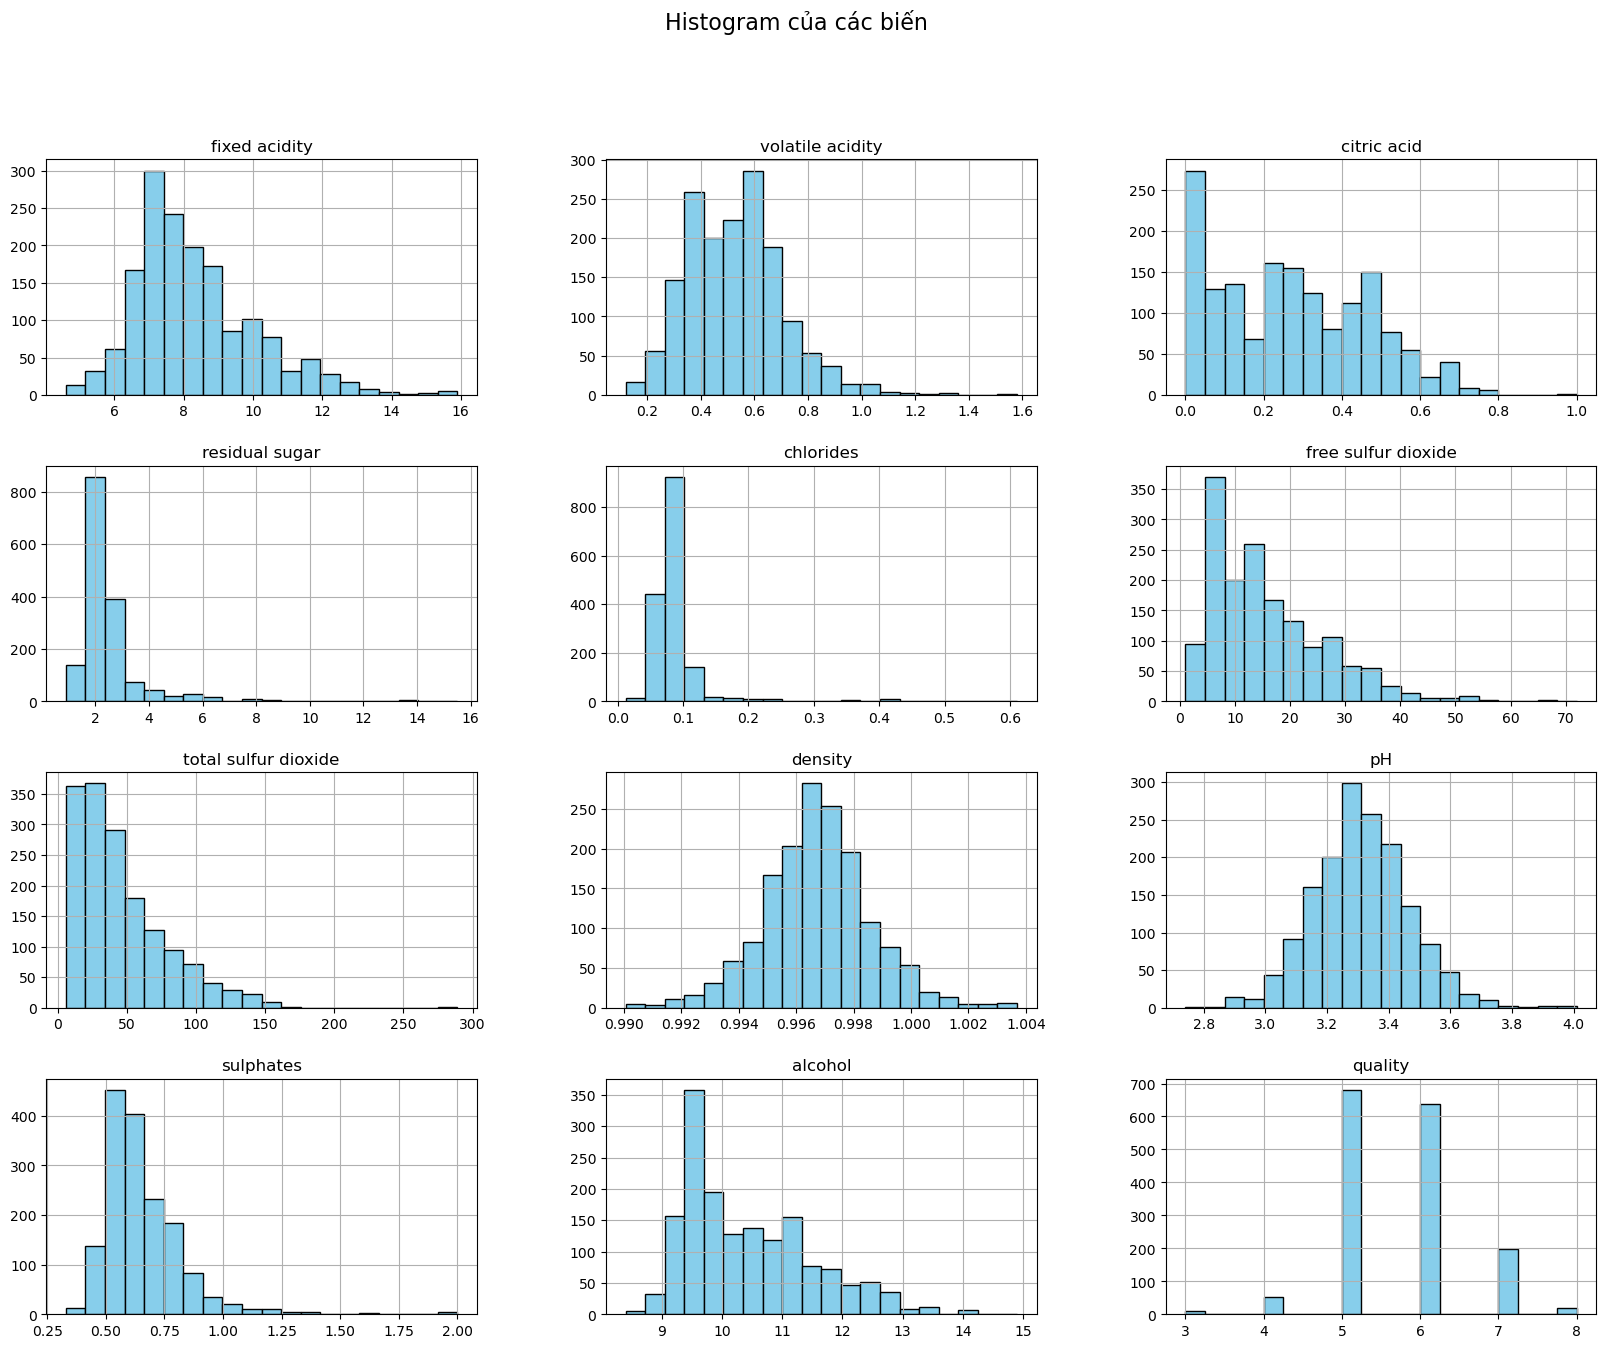

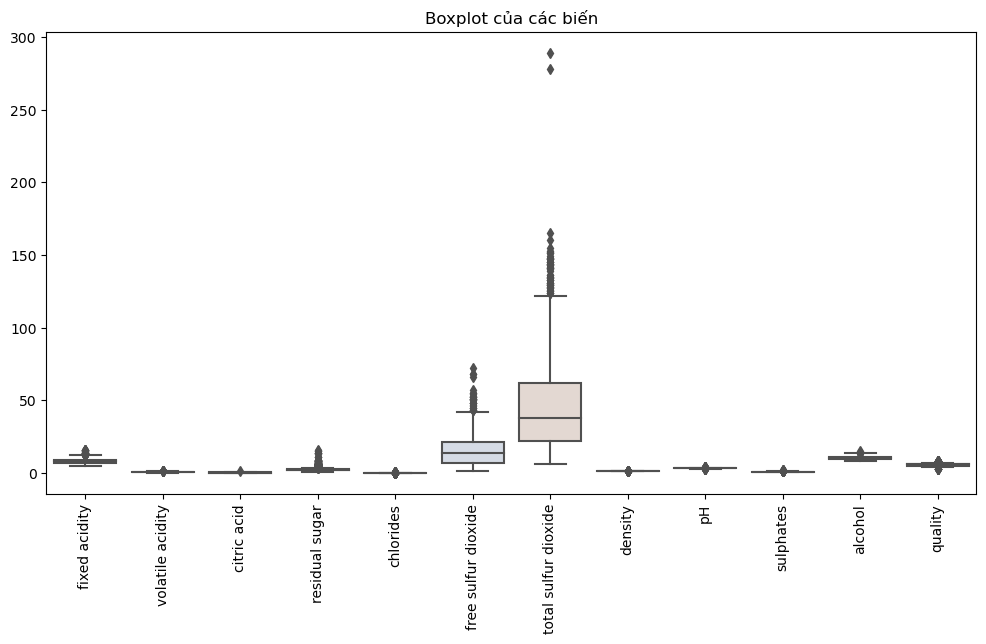

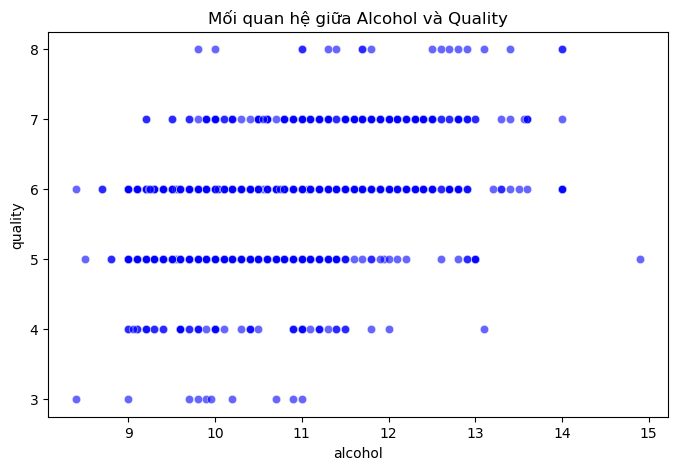

In [26]:
#2. Phân tích khám phá dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "winequality-red.csv"
df = pd.read_csv(file_path, sep=";")



# 2.1 Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 2.2 Vẽ histogram cho tất cả các biến
df.hist(bins=20, figsize=(20, 15), color="skyblue", edgecolor="black")
plt.suptitle("Histogram của các biến", fontsize=16)
plt.show()
# Nhận xét: Kiểm tra phân bố của từng biến, tìm hiểu xem có bị lệch hay không

# 2.3 Vẽ boxplot cho tất cả các biến
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot của các biến")
plt.show()
#Nhận xét: Xác định các giá trị ngoại lai.

# 2.4 Vẽ scatterplot giữa "alcohol" và "quality"
plt.figure(figsize=(8, 5))
sns.scatterplot(x="alcohol", y="quality", data=df, color="blue", alpha=0.6)
plt.title("Mối quan hệ giữa Alcohol và Quality")
plt.show()


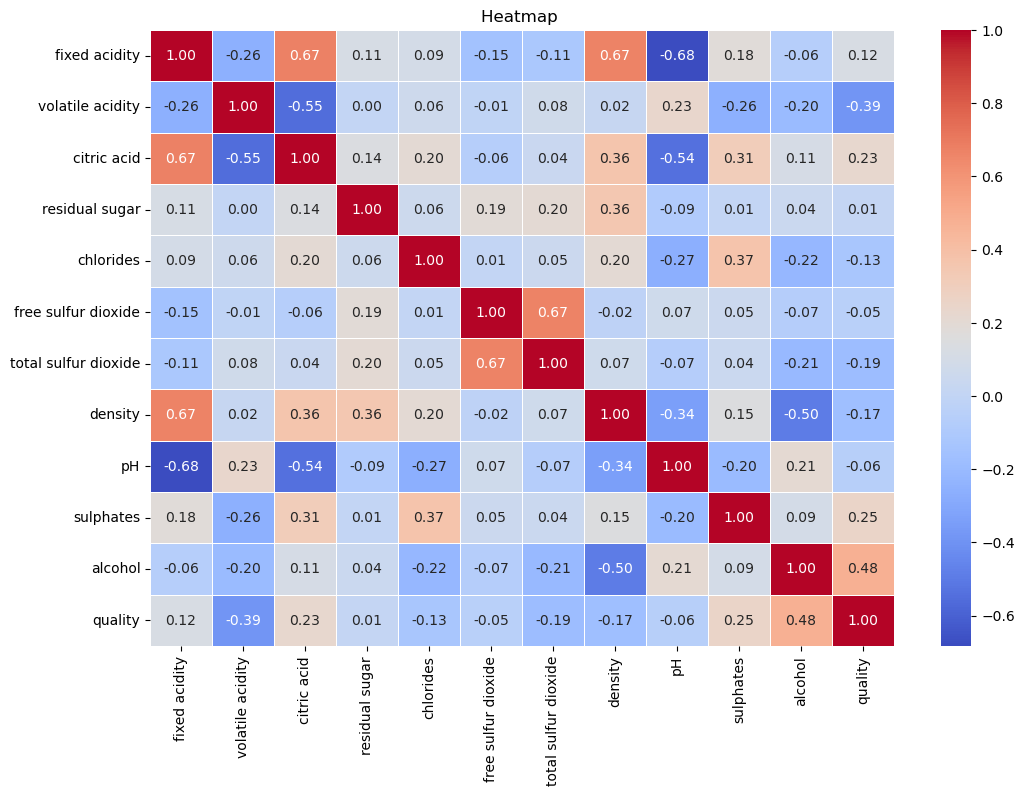

In [36]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

import matplotlib.pyplot as plt
import seaborn as sns
file_path = "winequality-red.csv"
df = pd.read_csv(file_path, sep=";")

# 3. Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap ", fontsize=12)
plt.show()


In [34]:
# 4. Chia tập tin dữ liệu thủ công không dùng thư viện có sẵn
import pandas as pd
import random
# Đọc dữ liệu từ tệp mới nhất
file_path = "winequality-red.csv"
df = pd.read_csv(file_path, sep=";")

# 4.1 Xáo trộn dữ liệu thủ công
data_list = df.values.tolist()  # Chuyển DataFrame thành danh sách
random.seed(42)  # Đảm bảo kết quả có thể tái lập
random.shuffle(data_list)

print(" 5 dòng đầu tiên sau khi xáo trộn:")
for row in data_list[:5]:
    print(row)

# 4.2 Chia dữ liệu với 80% huấn luyện, 20% kiểm tra
split_idx = int(0.8 * len(data_list))
train_data = data_list[:split_idx]
test_data = data_list[split_idx:]

print("\n Số lượng mẫu:")
print("Tập huấn luyện:", len(train_data))
print("Tập kiểm tra:", len(test_data))

# 4.3 Tách dữ liệu thành DataFrame
train_df = pd.DataFrame(train_data, columns=df.columns)
test_df = pd.DataFrame(test_data, columns=df.columns)

print("\n 5 dòng đầu tiên của tập huấn luyện:")
print(train_df.head())

print("\n 5 dòng đầu tiên của tập kiểm tra:")
print(test_df.head())

# 4.4 Tách đặc trưng (X) và nhãn (y)
X_train = train_df.drop(columns=["quality"]).values
y_train = train_df["quality"].values
X_test = test_df.drop(columns=["quality"]).values
y_test = test_df["quality"].values

# Hiển thị kích thước của các tập dữ liệu
print("\n Hình dạng của tập dữ liệu sau khi tách đặc trưng và nhãn:")
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# Hiển thị một số mẫu của dữ liệu sau khi tách
print("\n 5 dòng đầu tiên của X_train:")
print(X_train[:5])

print("\n 5 giá trị đầu tiên của y_train:")
print(y_train[:5])

print("\n 5 dòng đầu tiên của X_test:")
print(X_test[:5])

print("\n 5 giá trị đầu tiên của y_test:")
print(y_test[:5])

 5 dòng đầu tiên sau khi xáo trộn:
[7.2, 0.41, 0.3, 2.1, 0.083, 35.0, 72.0, 0.997, 3.44, 0.52, 9.4, 5.0]
[10.4, 0.41, 0.55, 3.2, 0.076, 22.0, 54.0, 0.9996, 3.15, 0.89, 9.9, 6.0]
[11.1, 0.39, 0.54, 2.7, 0.095, 21.0, 101.0, 1.0001, 3.13, 0.51, 9.5, 5.0]
[8.4, 0.62, 0.09, 2.2, 0.084, 11.0, 108.0, 0.9964, 3.15, 0.66, 9.8, 5.0]
[8.7, 0.52, 0.09, 2.5, 0.091, 20.0, 49.0, 0.9976, 3.34, 0.86, 10.6, 7.0]

 Số lượng mẫu:
Tập huấn luyện: 1279
Tập kiểm tra: 320

 5 dòng đầu tiên của tập huấn luyện:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2              0.41         0.30             2.1      0.083   
1           10.4              0.41         0.55             3.2      0.076   
2           11.1              0.39         0.54             2.7      0.095   
3            8.4              0.62         0.09             2.2      0.084   
4            8.7              0.52         0.09             2.5      0.091   

   free sulfur dioxide  total sulfur dio

In [37]:
# 5. Chuẩn bị dữ liệu

# 5.1 Khởi tạo bộ dữ liệu chuẩn hoá (dùng Min-Max scaling)
def min_max_scaling(X, min_vals=None, max_vals=None):
    if min_vals is None or max_vals is None:
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)
    return (X - min_vals) / (max_vals - min_vals), min_vals, max_vals

# 5.2 Chuẩn hoá tập huấn luyện
X_train_scaled, min_vals, max_vals = min_max_scaling(X_train)

# 5.3 Chuẩn hoá tập kiểm tra (sử dụng min/max từ tập huấn luyện)
X_test_scaled = (X_test - min_vals) / (max_vals - min_vals)

# Trả về 5 dòng đầu của dữ liệu chuẩn hóa
X_train_scaled[:5], X_test_scaled[:5]



(array([[0.2300885 , 0.19863014, 0.3       , 0.08219178, 0.11853088,
         0.47887324, 0.23321555, 0.50881057, 0.5511811 , 0.11377246,
         0.15384615],
        [0.51327434, 0.19863014, 0.55      , 0.15753425, 0.10684474,
         0.29577465, 0.16961131, 0.69970631, 0.32283465, 0.33532934,
         0.23076923],
        [0.57522124, 0.18493151, 0.54      , 0.12328767, 0.13856427,
         0.28169014, 0.33568905, 0.73641703, 0.30708661, 0.10778443,
         0.16923077],
        [0.33628319, 0.34246575, 0.09      , 0.0890411 , 0.12020033,
         0.14084507, 0.36042403, 0.46475771, 0.32283465, 0.19760479,
         0.21538462],
        [0.36283186, 0.2739726 , 0.09      , 0.10958904, 0.13188648,
         0.26760563, 0.15194346, 0.55286344, 0.47244094, 0.31736527,
         0.33846154]]),
 array([[0.28318584, 0.30136986, 0.12      , 0.07534247, 0.11686144,
         0.08450704, 0.07773852, 0.50881057, 0.49606299, 0.10179641,
         0.15384615],
        [0.46902655, 0.28767123, 0.45 

In [39]:
# 6. Ứng dụng mô hình hồi quy tuyến tính

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 6.1 Khởi tạo
model = LinearRegression()

# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4066691221399159
R^2 Score: 0.31190340046716936


In [ ]:
#7. Đánh giá mô hình 

# 7.1 Tính MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# 2. Cho dữ liệu howlongwelive: 

## 2.1 Tôi muốn biết có bao nhiêu cột và hàng 
## 2.2 Tôi muốn biết danh sách tên của các cột
## 2.3 Thử dùng df.["status"]
## 2.4 Tôi muốn biết có bao nhiêu nước đang phát triển và phát triển
## 2.5 tính min,max,mean,median của alcohol
## 2.6:
### a. Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo
### b. Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình



In [ ]:
import pandas as pd
# Đọc dữ liệu từ file CSV
file_path = "/Users/trantanphat/Documents/Python/QT/TranTanPhat_2274802010644_BTTH_Lab5/howlongwelive.csv"
df = pd.read_csv(file_path)

# 2.1 Hiển thị số lượng hàng và cột
num_rows, num_columns = df.shape
print(f"Số lượng hàng: {num_rows}")
print(f"Số lượng cột: {num_columns}")


Số lượng hàng: 2938
Số lượng cột: 22


In [44]:
# 2.2 Hiển thị danh sách tên các cột
column_names = df.columns.tolist()
print("Danh sách tên các cột:")
print(column_names)

Danh sách tên các cột:
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [45]:
# 2.3 Thử truy cập cột "Status"
status_column = df["Status"]
print("Cột 'Status':")
print(status_column.head())

Cột 'Status':
0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object


In [46]:
# 2.4 Đếm số lượng nước đang phát triển và phát triển
num_developing = df[df["Status"] == "Developing"].shape[0]
num_developed = df[df["Status"] == "Developed"].shape[0]
print(f"Số lượng nước đang phát triển: {num_developing}")
print(f"Số lượng nước phát triển: {num_developed}")

Số lượng nước đang phát triển: 2426
Số lượng nước phát triển: 512


In [47]:
# 2.5 Tính toán các giá trị min, max, mean, median của cột "Alcohol"
alcohol_min = df["Alcohol"].min()
alcohol_max = df["Alcohol"].max()
alcohol_mean = df["Alcohol"].mean()
alcohol_median = df["Alcohol"].median()
print(f"Min của Alcohol: {alcohol_min}")
print(f"Max của Alcohol: {alcohol_max}")
print(f"Mean của Alcohol: {alcohol_mean}")
print(f"Median của Alcohol: {alcohol_median}")

Min của Alcohol: 0.01
Max của Alcohol: 17.87
Mean của Alcohol: 4.602860787172012
Median của Alcohol: 3.755


In [48]:
# 2.6a Đếm số hàng có giá trị "Alcohol" lớn hơn mức trung bình và liệt kê các quốc gia độc đáo
above_mean_alcohol = df[df["Alcohol"] > alcohol_mean]
unique_countries_above_mean_alcohol = above_mean_alcohol["Country"].unique()
print(f"Số hàng có giá trị Alcohol lớn hơn mức trung bình: {above_mean_alcohol.shape[0]}")
print("Danh sách các quốc gia có giá trị Alcohol lớn hơn mức trung bình:")
print(unique_countries_above_mean_alcohol)

# 2.6b Lấy danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
schooling_mean = df["Schooling"].mean()
gdp_mean = df["GDP"].mean()
high_schooling_and_gdp = df[(df["Schooling"] > schooling_mean) & (df["GDP"] > gdp_mean)]
unique_countries_high_schooling_and_gdp = high_schooling_and_gdp["Country"].unique()
print("Danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình:")
print(unique_countries_high_schooling_and_gdp)

Số hàng có giá trị Alcohol lớn hơn mức trung bình: 1171
Danh sách các quốc gia có giá trị Alcohol lớn hơn mức trung bình:
['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Greece' 'Grenada' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Kazakhstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Mongolia'
 'Montenegro' 'Namibia' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'Rwanda' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and